In [1]:
import tensorflow as tf
import tensorflow.keras
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv
import pandas as pd
import numpy as np

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df_num_train=pd.read_csv(r"G:\datasets\MNIST_train.csv")
df_num_test=pd.read_csv(r"G:\datasets\MNIST_test.csv")

In [3]:
df_alp=pd.read_csv(r"G:\datasets\A_Z Handwritten Data.csv")

In [4]:
df_alp.shape

(372450, 785)

In [5]:
df_num_train.shape

(42000, 785)

In [6]:
df_num_test.shape

(28000, 784)

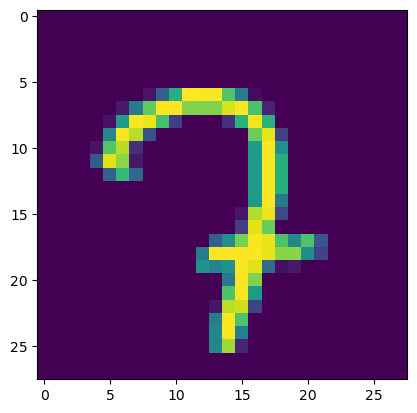

In [7]:
plt.imshow(df_num_train.drop(columns='label').iloc[np.random.randint(0,len(df_num_train))].values.reshape(28,28))

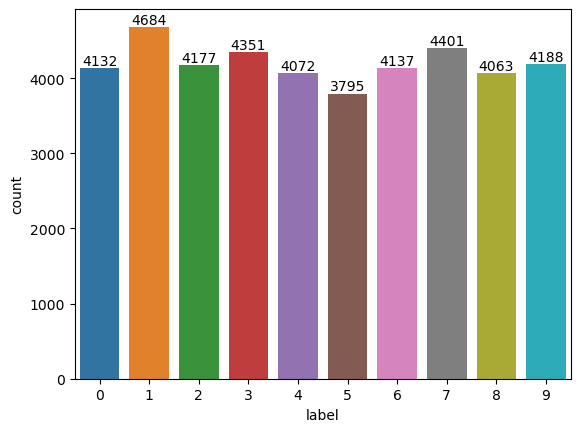

In [8]:
ax=sns.countplot(x='label',data=df_num_train)
for bars in ax.containers:
    ax.bar_label(bars)

In [9]:
df_alp.head(1)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
data_alp=df_alp.drop('0',axis=1)
labels_alp=df_alp['0']

In [11]:
data_alp.shape

(372450, 784)

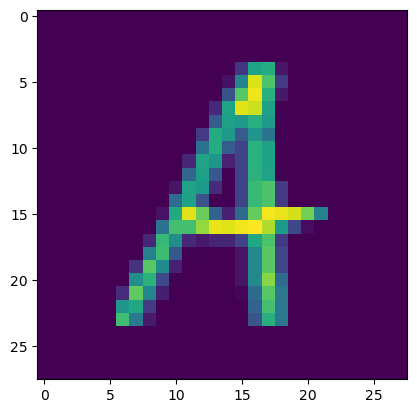

In [12]:
plt.imshow(data_alp.iloc[2].values.reshape(28,28))

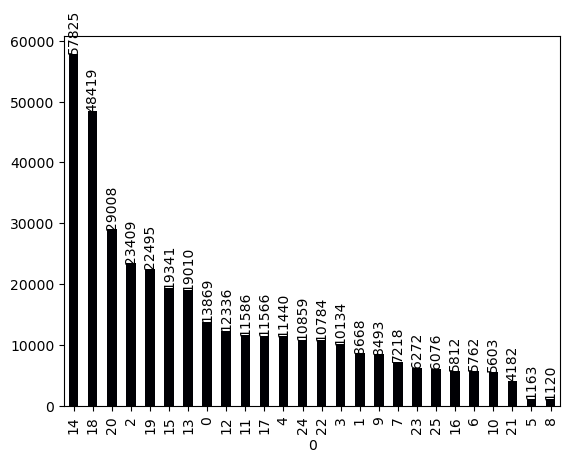

In [13]:
ax2=labels_alp.value_counts().plot(kind='bar',cmap='magma')
for bars in ax2.containers:
    ax2.bar_label(bars,rotation=90)

In [14]:
df_num_train_data=df_num_train.drop(columns='label')

In [15]:
df_num_train_label=df_num_train['label']

In [16]:
df_alp_small=df_alp.sample(50000)

In [17]:
df_alp_data=df_alp_small.drop('0',axis=1)
df_alp_label=df_alp_small['0']

In [18]:
df_alp_data.shape

(50000, 784)

In [19]:
df_alp_label.shape

(50000,)

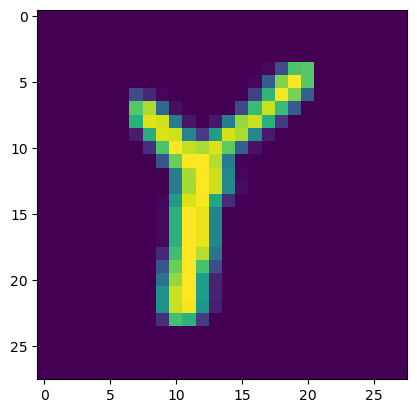

In [20]:
plt.imshow(df_alp_data.iloc[np.random.randint(0,40000)].values.reshape(28,28))

<Axes: xlabel='0'>

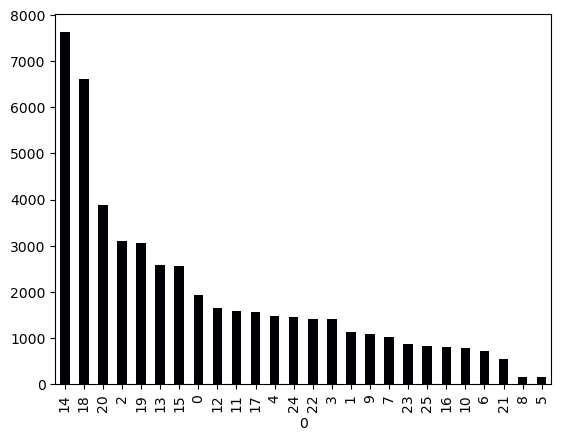

In [21]:
df_alp_label.value_counts().plot(kind='bar',cmap='magma')

In [22]:
df_num_train_data=np.array(df_num_train_data)
df_num_train_label=np.array(df_num_train_label)

In [23]:
df_alp_data=np.array(df_alp_data)
df_alp_label=np.array(df_alp_label)

In [24]:
df_num_train_data.shape

(42000, 784)

In [25]:
df_alp_data.shape

(50000, 784)

In [26]:
data=np.vstack([df_num_train_data,df_alp_data])

In [27]:
df_alp_label=df_alp_label+10
labels=np.hstack([df_num_train_label,df_alp_label])

In [28]:
labels.shape

(92000,)

In [29]:
data.shape

(92000, 784)

In [30]:
data = np.reshape(data, (data.shape[0], 28, 28))

In [31]:
data.shape

(92000, 28, 28)

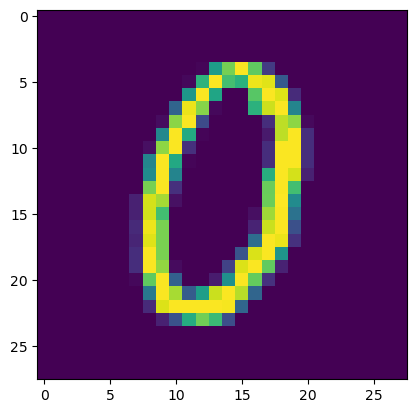

In [32]:
plt.imshow(data[5])

In [33]:
from collections import Counter

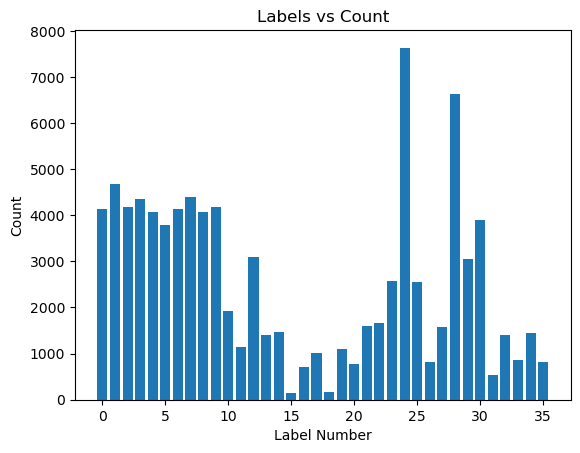

In [34]:
x=Counter(labels)
ax=plt.bar(x.keys(),x.values())
plt.title('Labels vs Count')
plt.xlabel('Label Number')
plt.ylabel('Count')
plt.show()

In [35]:
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35], dtype=int64)

In [36]:
data=data/255

In [37]:
data.min()

0.0

In [38]:
data.max()

1.0

In [39]:
len(np.unique(labels))

36

In [40]:
from sklearn.preprocessing import LabelBinarizer

In [41]:
l=LabelBinarizer()

In [42]:
labels=l.fit_transform(labels)

In [43]:
labels.shape

(92000, 36)

In [44]:
labels[5]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

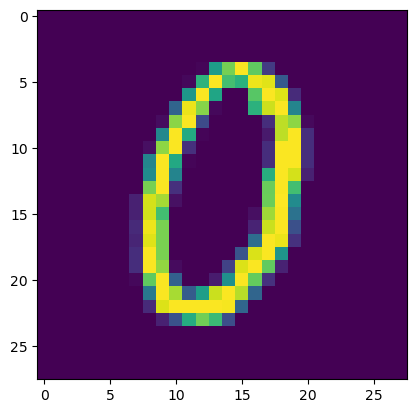

In [45]:
plt.imshow(data[5])

In [46]:
labels[45000]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

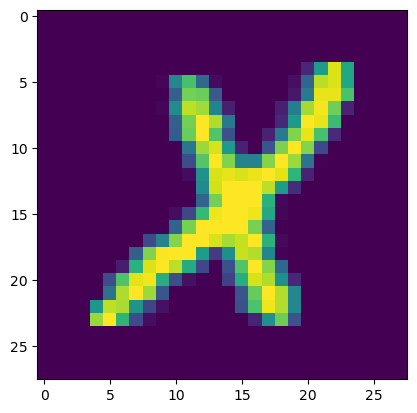

In [47]:
plt.imshow(data[45000])

In [48]:
classes=labels.sum(axis=0)

In [49]:
classes

array([4132, 4684, 4177, 4351, 4072, 3795, 4137, 4401, 4063, 4188, 1929,
       1134, 3100, 1410, 1474,  150,  719, 1015,  159, 1093,  770, 1589,
       1658, 2576, 7633, 2552,  808, 1570, 6621, 3056, 3890,  545, 1412,
        869, 1449,  819])

In [50]:
classes.min()

150

In [51]:
classes.max()

7633

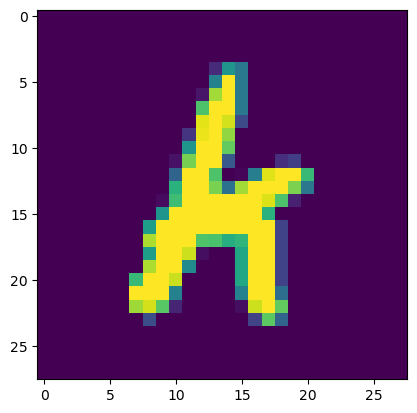

In [52]:
plt.imshow(data[65000])

In [53]:
labels[65000]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [54]:
classes_weights={}
for i in range(0,len(classes)):
    classes_weights[i]=classes.max()/classes[i]

In [55]:
classes_weights

{0: 1.8472894482090998,
 1: 1.6295900939368062,
 2: 1.8273880775676323,
 3: 1.754309354171455,
 4: 1.8745088408644401,
 5: 2.01133069828722,
 6: 1.8450568044476674,
 7: 1.7343785503294706,
 8: 1.8786610878661087,
 9: 1.822588347659981,
 10: 3.9569725246241574,
 11: 6.731040564373898,
 12: 2.462258064516129,
 13: 5.4134751773049645,
 14: 5.17842605156038,
 15: 50.88666666666666,
 16: 10.616133518776078,
 17: 7.520197044334975,
 18: 48.0062893081761,
 19: 6.983531564501372,
 20: 9.912987012987013,
 21: 4.803650094398993,
 22: 4.603739445114596,
 23: 2.963121118012422,
 24: 1.0,
 25: 2.990987460815047,
 26: 9.446782178217822,
 27: 4.861783439490446,
 28: 1.1528470019634496,
 29: 2.49770942408377,
 30: 1.9622107969151672,
 31: 14.005504587155963,
 32: 5.4058073654390935,
 33: 8.783659378596088,
 34: 5.267770876466528,
 35: 9.31990231990232}

In [56]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [57]:
aug=ImageDataGenerator(rotation_range=15,zoom_range=0.1,width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=False,validation_split=0.2)

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint

In [59]:
model=Sequential()

model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1),padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(BatchNormalization())

model.add(Conv2D(512,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(36,activation='softmax'))

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 128)       0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 14, 14, 128)       512       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 256)       295168    
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 256)       5

In [61]:
es=EarlyStopping(patience=7,min_delta=0,restore_best_weights=True,monitor='val_loss')

In [62]:
lr=ReduceLROnPlateau(patience=7,factor=0.2,min_deta=0,monitor='val_loss')

In [63]:
m='custom_ocr.model'
folder_path='E:\OCR_MODEL'
import os
path=os.path.join(folder_path,m)
cp=ModelCheckpoint(filepath=path,monitor='val_loss',save_best_only=True,mode='min')

In [64]:
cb=[cp,es,lr]

In [65]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [66]:
batch_size=32
epochs=100

In [67]:
data=np.expand_dims(data,axis=-1)

In [68]:
data.shape

(92000, 28, 28, 1)

In [69]:
training_data=aug.flow(data,labels,batch_size=32,subset='training')
testing_data=aug.flow(data,labels,batch_size=32,subset='validation')

In [70]:
training_data

In [71]:
history=model.fit(training_data,validation_data=testing_data,epochs=10,batch_size=32,callbacks=cb,class_weight=classes_weights)

Epoch 1/10


2300/2300 [==============================] - ETA: 0s - loss: 2.3797 - accuracy: 0.7728INFO:tensorflow:Assets written to: E:\OCR_MODEL\custom_ocr.model\assets


INFO:tensorflow:Assets written to: E:\OCR_MODEL\custom_ocr.model\assets


2300/2300 [==============================] - 335s 145ms/step - loss: 2.3797 - accuracy: 0.7728 - val_loss: 2.0414 - val_accuracy: 0.5418 - lr: 0.0010
Epoch 2/10
2300/2300 [==============================] - ETA: 0s - loss: 1.1849 - accuracy: 0.8695INFO:tensorflow:Assets written to: E:\OCR_MODEL\custom_ocr.model\assets


INFO:tensorflow:Assets written to: E:\OCR_MODEL\custom_ocr.model\assets


2300/2300 [==============================] - 344s 149ms/step - loss: 1.1849 - accuracy: 0.8695 - val_loss: 0.8951 - val_accuracy: 0.6917 - lr: 0.0010
Epoch 3/10
2300/2300 [==============================] - ETA: 0s - loss: 0.9456 - accuracy: 0.8888INFO:tensorflow:Assets written to: E:\OCR_MODEL\custom_ocr.model\assets


INFO:tensorflow:Assets written to: E:\OCR_MODEL\custom_ocr.model\assets


2300/2300 [==============================] - 346s 151ms/step - loss: 0.9456 - accuracy: 0.8888 - val_loss: 0.4388 - val_accuracy: 0.8728 - lr: 0.0010
Epoch 4/10
2300/2300 [==============================] - 351s 153ms/step - loss: 0.9346 - accuracy: 0.8939 - val_loss: 0.4592 - val_accuracy: 0.8390 - lr: 0.0010
Epoch 5/10
2300/2300 [==============================] - ETA: 0s - loss: 0.7966 - accuracy: 0.9036INFO:tensorflow:Assets written to: E:\OCR_MODEL\custom_ocr.model\assets


INFO:tensorflow:Assets written to: E:\OCR_MODEL\custom_ocr.model\assets


2300/2300 [==============================] - 345s 150ms/step - loss: 0.7966 - accuracy: 0.9036 - val_loss: 0.4172 - val_accuracy: 0.8635 - lr: 0.0010
Epoch 6/10
2300/2300 [==============================] - ETA: 0s - loss: 0.8391 - accuracy: 0.9038INFO:tensorflow:Assets written to: E:\OCR_MODEL\custom_ocr.model\assets


INFO:tensorflow:Assets written to: E:\OCR_MODEL\custom_ocr.model\assets


2300/2300 [==============================] - 355s 154ms/step - loss: 0.8391 - accuracy: 0.9038 - val_loss: 0.4089 - val_accuracy: 0.9011 - lr: 0.0010
Epoch 7/10
2300/2300 [==============================] - ETA: 0s - loss: 0.6705 - accuracy: 0.9133INFO:tensorflow:Assets written to: E:\OCR_MODEL\custom_ocr.model\assets


INFO:tensorflow:Assets written to: E:\OCR_MODEL\custom_ocr.model\assets


2300/2300 [==============================] - 354s 154ms/step - loss: 0.6705 - accuracy: 0.9133 - val_loss: 0.3077 - val_accuracy: 0.9017 - lr: 0.0010
Epoch 8/10
2300/2300 [==============================] - 374s 163ms/step - loss: 0.6150 - accuracy: 0.9173 - val_loss: 0.3346 - val_accuracy: 0.8857 - lr: 0.0010
Epoch 9/10
2300/2300 [==============================] - 343s 149ms/step - loss: 0.6185 - accuracy: 0.9188 - val_loss: 0.3522 - val_accuracy: 0.8544 - lr: 0.0010
Epoch 10/10
2300/2300 [==============================] - ETA: 0s - loss: 0.5481 - accuracy: 0.9213INFO:tensorflow:Assets written to: E:\OCR_MODEL\custom_ocr.model\assets


INFO:tensorflow:Assets written to: E:\OCR_MODEL\custom_ocr.model\assets


2300/2300 [==============================] - 347s 151ms/step - loss: 0.5481 - accuracy: 0.9213 - val_loss: 0.2378 - val_accuracy: 0.9160 - lr: 0.0010


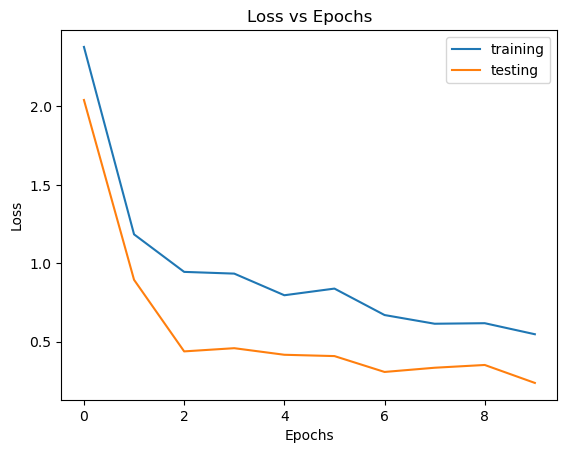

In [73]:
plt.plot(history.history['loss'],label='training')
plt.plot(history.history['val_loss'],label='testing')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

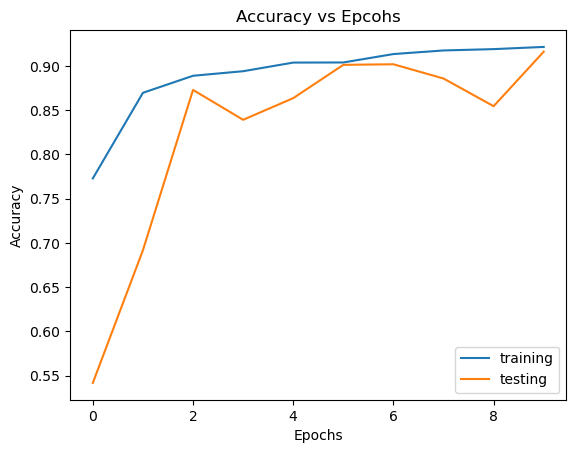

In [74]:
plt.plot(history.history['accuracy'],label='training')
plt.plot(history.history['val_accuracy'],label='testing')
plt.title('Accuracy vs Epcohs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Generating Testing Data

In [75]:
nums=df_num_train.sample(500)

In [76]:
alps=df_alp.sample(500)

In [77]:
df1=nums.drop(columns='label')
df2=alps.drop('0',axis=1)

In [78]:
label1=nums['label']
label2=alps['0']

In [85]:
df1=np.array(df1)
df2=np.array(df2)
label1=np.array(label1)
label2=np.array(label2)
test_data=np.vstack([df1,df2])
test_label=np.hstack([label1,label2])

In [86]:
test_data=test_data/255

In [87]:
test_data.min()

0.0

In [88]:
test_data.max()

1.0

In [91]:
test_data.shape

(1000, 784)

In [93]:
test_data=np.reshape(test_data,(test_data.shape[0],28,28))

In [94]:
test_data=np.expand_dims(test_data,axis=-1)

In [95]:
test_data.shape

(1000, 28, 28, 1)

In [96]:
aug_test=ImageDataGenerator()

In [97]:
testing_data=aug_test.flow(test_data,test_label,batch_size=32)

In [102]:
y_pred=np.argmax(model.predict(test_data,batch_size=32))

32/32 [==============================] - 1s 34ms/step


In [103]:
y_pred.shape

()

In [105]:
from sklearn.metrics import classification_report

In [107]:
test_label.shape

(1000,)

In [108]:
saving_path='E:\OCR_MODEL\model'
file_name='my_ocr_model.h5'
path=os.path.join(saving_path,file_name)
model.save(path)

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [109]:
from tensorflow.keras.models import load_model
ocr=load_model(path)

In [110]:
ocr.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 128)       0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 14, 14, 128)       512       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 256)       295168    
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 256)       5

In [111]:
img=cv.imread(r"E:\Courses\Optical Character Recognition\Images\letter-m.jpg")

In [112]:
img=cv.cvtColor(img,cv.COLOR_BGR2GRAY)

In [113]:
img.shape

(30, 30)

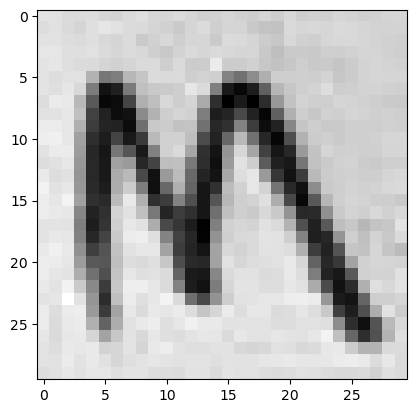

In [114]:
plt.imshow(img,cmap='gray')

In [120]:
threshold,thresh=cv.threshold(img,0,255,cv.THRESH_BINARY_INV|cv.THRESH_OTSU)

In [121]:
threshold

137.0

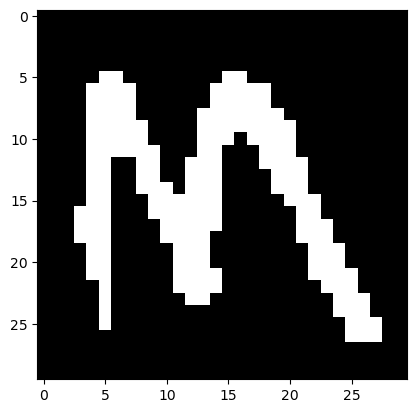

In [122]:
plt.imshow(thresh,cmap='gray')

In [123]:
thresh.shape

(30, 30)

In [124]:
thresh=cv.resize(thresh,(28,28))

In [125]:
img=thresh.astype(float)/255.0
img=np.expand_dims(img,axis=-1)
img.shape

(28, 28, 1)